In [2]:
from deepinterpolation import utils
#why doesn't this work
#import deepinterpolation as dp
import numpy as np
import matplotlib.pyplot as plt
import os
from importlib import reload

(0.0, 1.0)

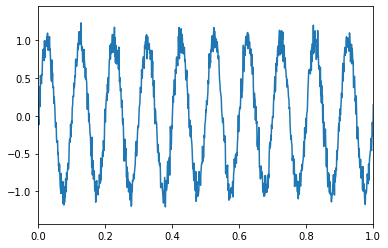

In [31]:
X, N = utils.generate_dataset(10, (5, 5), 1e3, 10)
t = np.linspace(0, 10, 10*1000)
plt.plot(t, X[:, 2, 2])
plt.xlim([0, 1])

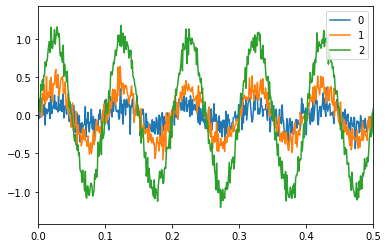

In [5]:
plt.plot(t, X[:, :3, 2])
plt.xlim([0, 0.5])
plt.legend([str(r) for r in range(5)])

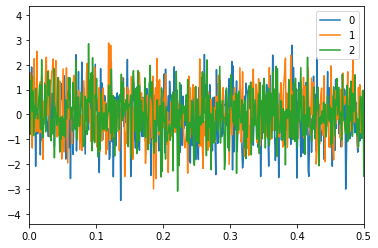

In [6]:
plt.plot(t, N[:, :3, 2])
plt.xlim([0, 0.5])
plt.legend([str(r) for r in range(5)])

In [14]:
X.shape

(10000, 5, 5)

In [23]:
reload(utils)

<module 'deepinterpolation.utils' from '/home/jhermiz/software/deepinterpolation/deepinterpolation/utils.py'>

In [24]:
utils.dump_as_dat2('../sample_data/noisy_sine.dat2', X)

In [25]:
fpr = utils.load_dat2('../sample_data/noisy_sine.dat2', np.float64, X.shape)

In [26]:
fpr.shape

(10000, 5, 5)

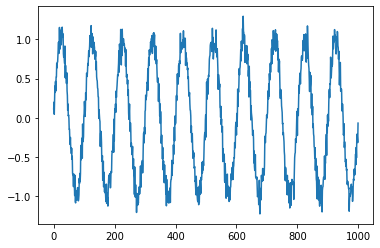

In [28]:
x = fpr[:1000, 2, 2]
plt.plot(x)

## Now that it's validated. Generated a dataset that resembles the test dataset

In [60]:
reload(utils)

<module 'deepinterpolation.utils' from '/home/jhermiz/software/deepinterpolation/deepinterpolation/utils.py'>

(0.0, 1.0)

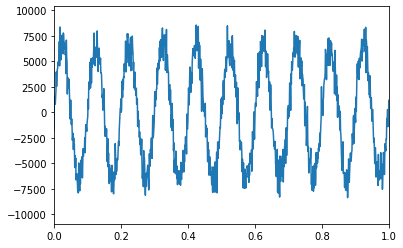

In [62]:
X, N = utils.generate_dataset(10, (384//2, 2), 1e3, 10, decay=1/10)
t = np.linspace(0, 10, 10*1000)
plt.plot(t, X[:, 100, 0])
plt.xlim([0, 1])

In [ ]:
X[:5]

(0.0, 1.0)

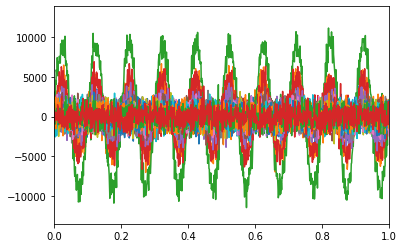

In [64]:
plt.plot(t, X[:, ::8, 0])
plt.xlim([0, 1])

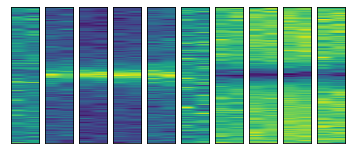

In [65]:
fig, axs = plt.subplots(1,10)
for tidx, to in enumerate(np.arange(10)*10):
    axs[tidx].imshow(X[to, :, :], aspect=1/20, interpolation=None)
    axs[tidx].set_xticks([])
    axs[tidx].set_yticks([])

In [66]:
utils.dump_as_dat2('../sample_data/noisy_sine_np.dat2', X)

### Change path to where data is in 'example_tiny_ephys_inference.py' and any other paths or args

In [67]:
reload(utils)

<module 'deepinterpolation.utils' from '/home/jhermiz/software/deepinterpolation/deepinterpolation/utils.py'>

In [4]:
filtered_data_path = '/home/jhermiz/software/models/tiny_ephys.h5'
Xf = utils.load_h5(filtered_data_path)
Xf.shape

(100, 384, 2, 1)

In [5]:
Xf = np.squeeze(Xf, axis=-1)
Xf.shape

(100, 384, 2)

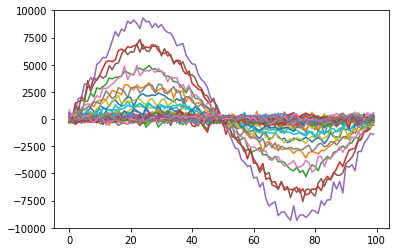

In [6]:
plt.plot(Xf[:, ::8, 0])
plt.ylim([-10000, 10000])
pass

In [7]:
X = utils.load_dat2('../sample_data/noisy_sine_np.dat2', np.int16, (10*1000, 192, 2))

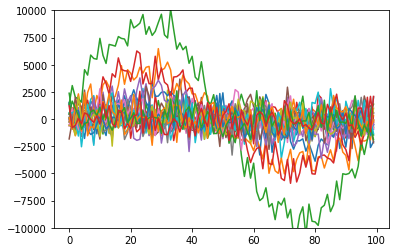

In [9]:
plt.plot(X[:100, ::8, 0])
plt.ylim([-10000, 10000])
pass

In [84]:
X, Xf = np.float32(X), np.float32(Xf)

In [85]:
X = X/np.max(X)
Xf = Xf/np.max(Xf)

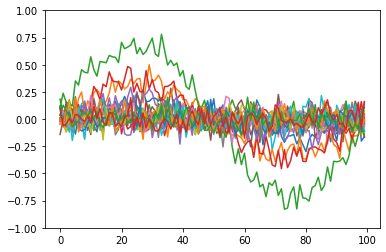

In [86]:
plt.plot(X[:100, ::8, 0])
plt.ylim([-1, 1])
pass

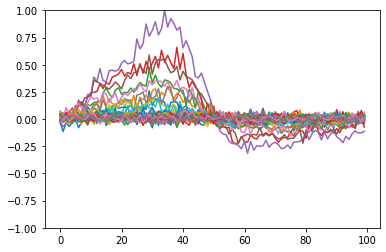

In [87]:
plt.plot(Xf[:100, ::8, 0])
plt.ylim([-1, 1])
pass

In [88]:
X = utils.load_dat2('../sample_data/noisy_sine_np.dat2', np.int16, (10*1000, 192, 2))

In [89]:
N.shape

(10000, 192, 2)

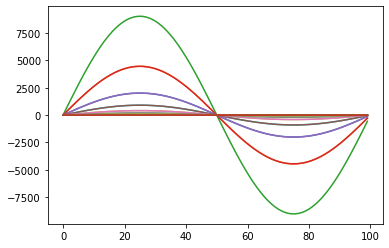

In [91]:
Xt = X - N
plt.plot(Xt[:100, ::8, 0])
pass

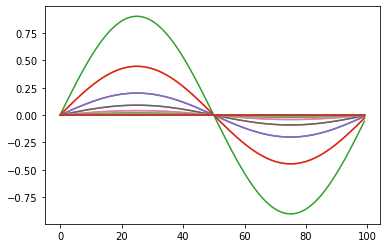

In [93]:
Xt = np.float32(Xt)/10e3
plt.plot(Xt[:100, ::8, 0])
pass

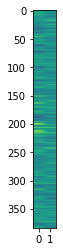

In [9]:
plt.imshow(Xf[0, :, :], aspect=1/20, interpolation=None)

In [10]:
reload(utils)

<module 'deepinterpolation.utils' from '/home/jhermiz/software/deepinterpolation/deepinterpolation/utils.py'>

(<Figure size 432x288 with 10 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

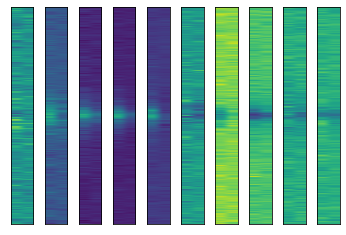

In [12]:
utils.plot_frames(Xf, np.arange(0, 100, 10))

(<Figure size 432x288 with 10 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

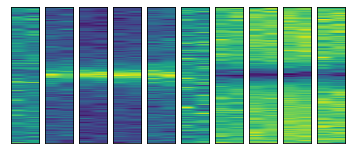

In [14]:
utils.plot_frames(X, np.arange(0, 100, 10))

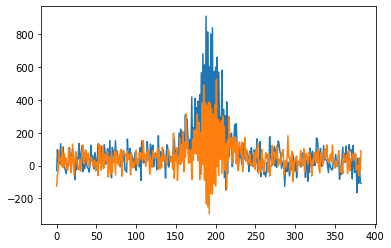

In [13]:
plt.plot(Xf[10, :, 0])
plt.plot(Xf[10, :, 1])

In [10]:
Xfr = np.zeros((100, 384))
Xfr[:, np.arange(0, 384, 2)] = Xf[:, np.arange(0, 384, 2), 0]
Xfr[:, np.arange(1, 384, 2)] = Xf[:, np.arange(1, 384, 2), 0]
Xfrr = np.reshape(Xfr, (100, 192, 2))


(<Figure size 432x288 with 10 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

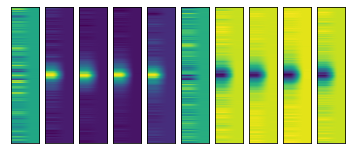

In [11]:
utils.plot_frames(Xfrr, np.arange(0, 100, 10))

(<Figure size 432x288 with 10 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

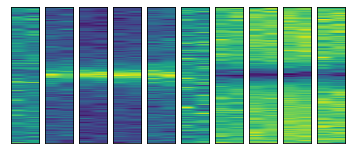

In [12]:
utils.plot_frames(X, np.arange(0, 100, 10))

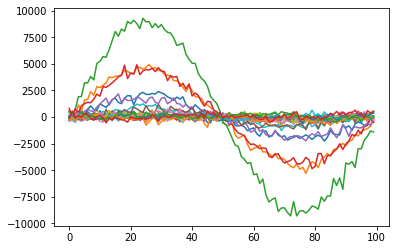

In [13]:
plt.plot(Xfrr[:, ::8, 0])
pass

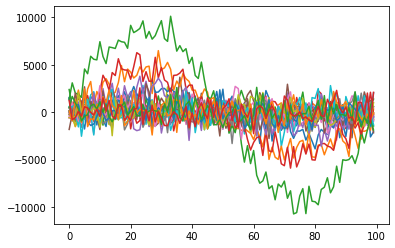

In [14]:
plt.plot(X[:100, ::8, 0])
pass

In [28]:
X.shape

(10000, 192, 2)

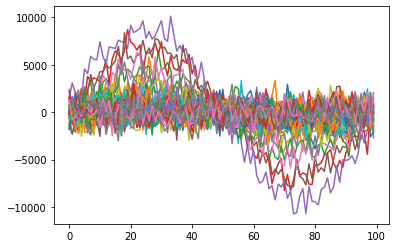

In [17]:
X2d = np.reshape(X, (X.shape[0], -1))
plt.plot(X2d[:100, ::8])

In [18]:
Xfrr2d = np.reshape(Xfrr, (Xfrr.shape[0], -1))

In [38]:
R = np.corrcoef(X2d[:100, :], Xfrr2d[:, 100], rowvar=False)
R.shape

(385, 385)

In [ ]:
!pip install seaborn

In [43]:
import seaborn as sns

<AxesSubplot:>

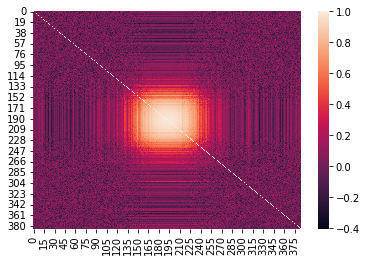

In [44]:
sns.heatmap(R)

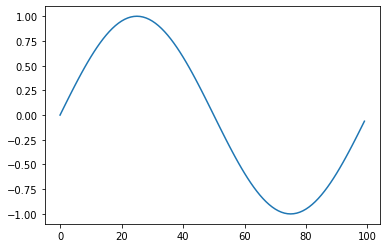

In [15]:
t = np.linspace(0, 10, 10000)
s = np.sin(2*t*np.pi*10)
plt.plot(s[:100])

In [ ]:
X2d.shape

In [19]:
Rt = np.zeros(384)
for idx in range(384):
    tmp = np.corrcoef(X2d[:100, idx], s[:100])
    Rt[idx] = tmp[0, 1]

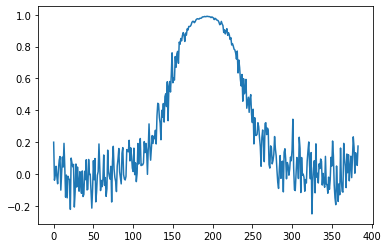

In [20]:
plt.plot(Rt)

In [21]:
Rf = np.zeros(384)
for idx in range(384):
    tmp = np.corrcoef(Xfrr2d[:100, idx], s[:100])
    Rf[idx] = tmp[0, 1]

In [83]:
%matplotlib inline

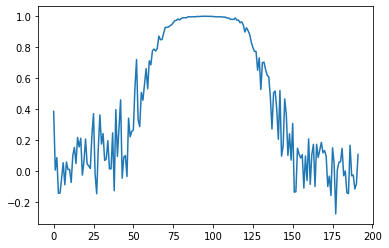

In [22]:
plt.plot(Rf[::2])

In [24]:
import seaborn as sns

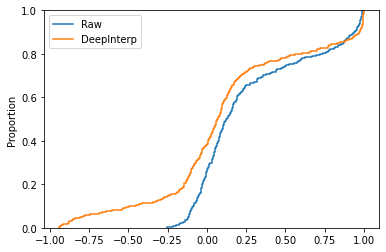

In [25]:
sns.ecdfplot(Rt)
sns.ecdfplot(Rf)
plt.legend(['Raw', 'DeepInterp'])


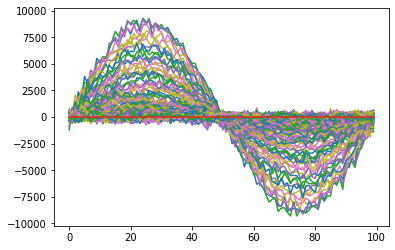

In [29]:
plt.plot(Xfrr2d)

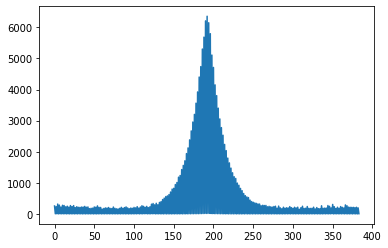

In [32]:
Xfn = Xfrr2d - np.reshape(s[:100], (-1, 1))
Xfrms = np.mean(Xfn**2, axis=0)**0.5
plt.plot(Xfrms)

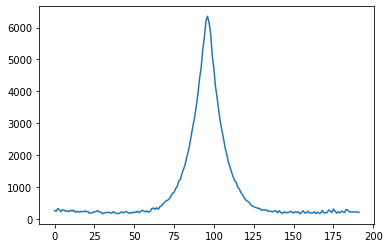

In [35]:
plt.plot(Xfrms[::2])

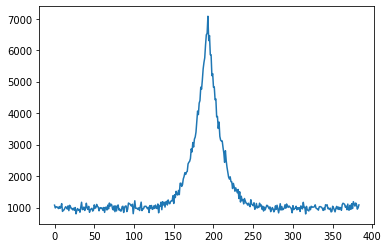

In [37]:
N2d = X2d[:100, :] - np.reshape(s[:100], (-1, 1))
Xrms = np.mean(N2d**2, axis=0)**0.5
plt.plot(Xrms)

Text(0.5, 0, 'RMS')

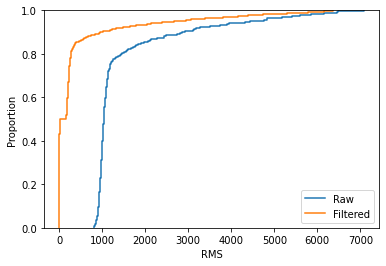

In [39]:
sns.ecdfplot(Xrms)
sns.ecdfplot(Xfrms)
plt.legend(['Raw', 'Filtered'])
plt.xlabel('RMS')

<AxesSubplot:ylabel='Count'>

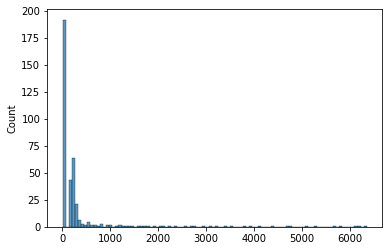

In [40]:
sns.histplot(Xfrms)

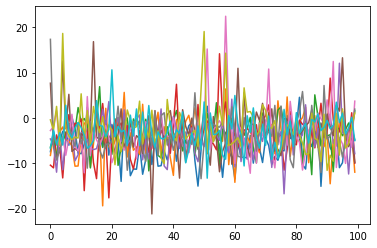

In [46]:
plt.plot(Xfrr2d[:100, np.arange(1, 20, 2)])

In [43]:
blah = np.sum(abs(Xfrr2d), axis=0)
blah_sorted = np.sort(blah)

array([2.32679385e+02, 2.69103899e+02, 2.97673526e+02, 3.12411599e+02,
       3.14429668e+02, 3.18940002e+02, 3.20507950e+02, 3.22663517e+02,
       3.23562883e+02, 3.28488762e+02, 3.29246365e+02, 3.34339672e+02,
       3.38291259e+02, 3.41868311e+02, 3.43592165e+02, 3.45972268e+02,
       3.46919192e+02, 3.47948900e+02, 3.49040566e+02, 3.51941325e+02,
       3.52973587e+02, 3.53576461e+02, 3.54895370e+02, 3.55310823e+02,
       3.55958543e+02, 3.58031695e+02, 3.58226674e+02, 3.58348727e+02,
       3.60385436e+02, 3.61390305e+02, 3.63245124e+02, 3.63736100e+02,
       3.66755425e+02, 3.67001328e+02, 3.67063428e+02, 3.68282294e+02,
       3.69719156e+02, 3.71202428e+02, 3.74548401e+02, 3.75582663e+02,
       3.76754650e+02, 3.77218084e+02, 3.78076968e+02, 3.78991425e+02,
       3.79629718e+02, 3.80315466e+02, 3.81188469e+02, 3.82833842e+02,
       3.83354723e+02, 3.83368810e+02, 3.84489538e+02, 3.85442466e+02,
       3.85838169e+02, 3.86279894e+02, 3.88551358e+02, 3.88970822e+02,
      

In [ ]:
plt.plo